<a href="https://colab.research.google.com/github/FatimahHabib84/FatimahHabib84/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#“House Prices” competition in kaggle

Dataset Link:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

compettetion link in kaggle:
https://www.kaggle.com/code/cyrillescolano/house-prices-prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import missingno as ms
from sklearn.impute import SimpleImputer
from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn import tree, model_selection, ensemble, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso


from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
data=read_csv("train.csv")

In [ ]:
data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
saleType = ((np.asarray(data['SaleType'])).reshape(20,73))
salePrice = ((np.asarray(data['SalePrice'])).reshape(20,73))

print(saleType)
print(salePrice)

[['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ['WD' 'WD' 'WD' ... 'WD' 'ConLI' 'WD']
 ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ...
 ['New' 'WD' 'New' ... 'New' 'WD' 'WD']
 ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ['CWD' 'WD' 'WD' ... 'WD' 'WD' 'WD']]
[[208500 181500 223500 ... 244000 129500 185000]
 [144900 107400  91000 ... 204000 125000 130000]
 [105000 222500 141000 ... 210000 107000 311500]
 ...
 [248328 170000 465000 ... 203000 302000 333168]
 [119000 206900 295493 ... 105000 125500 250000]
 [136000 377500 131000 ... 266500 142125 147500]]


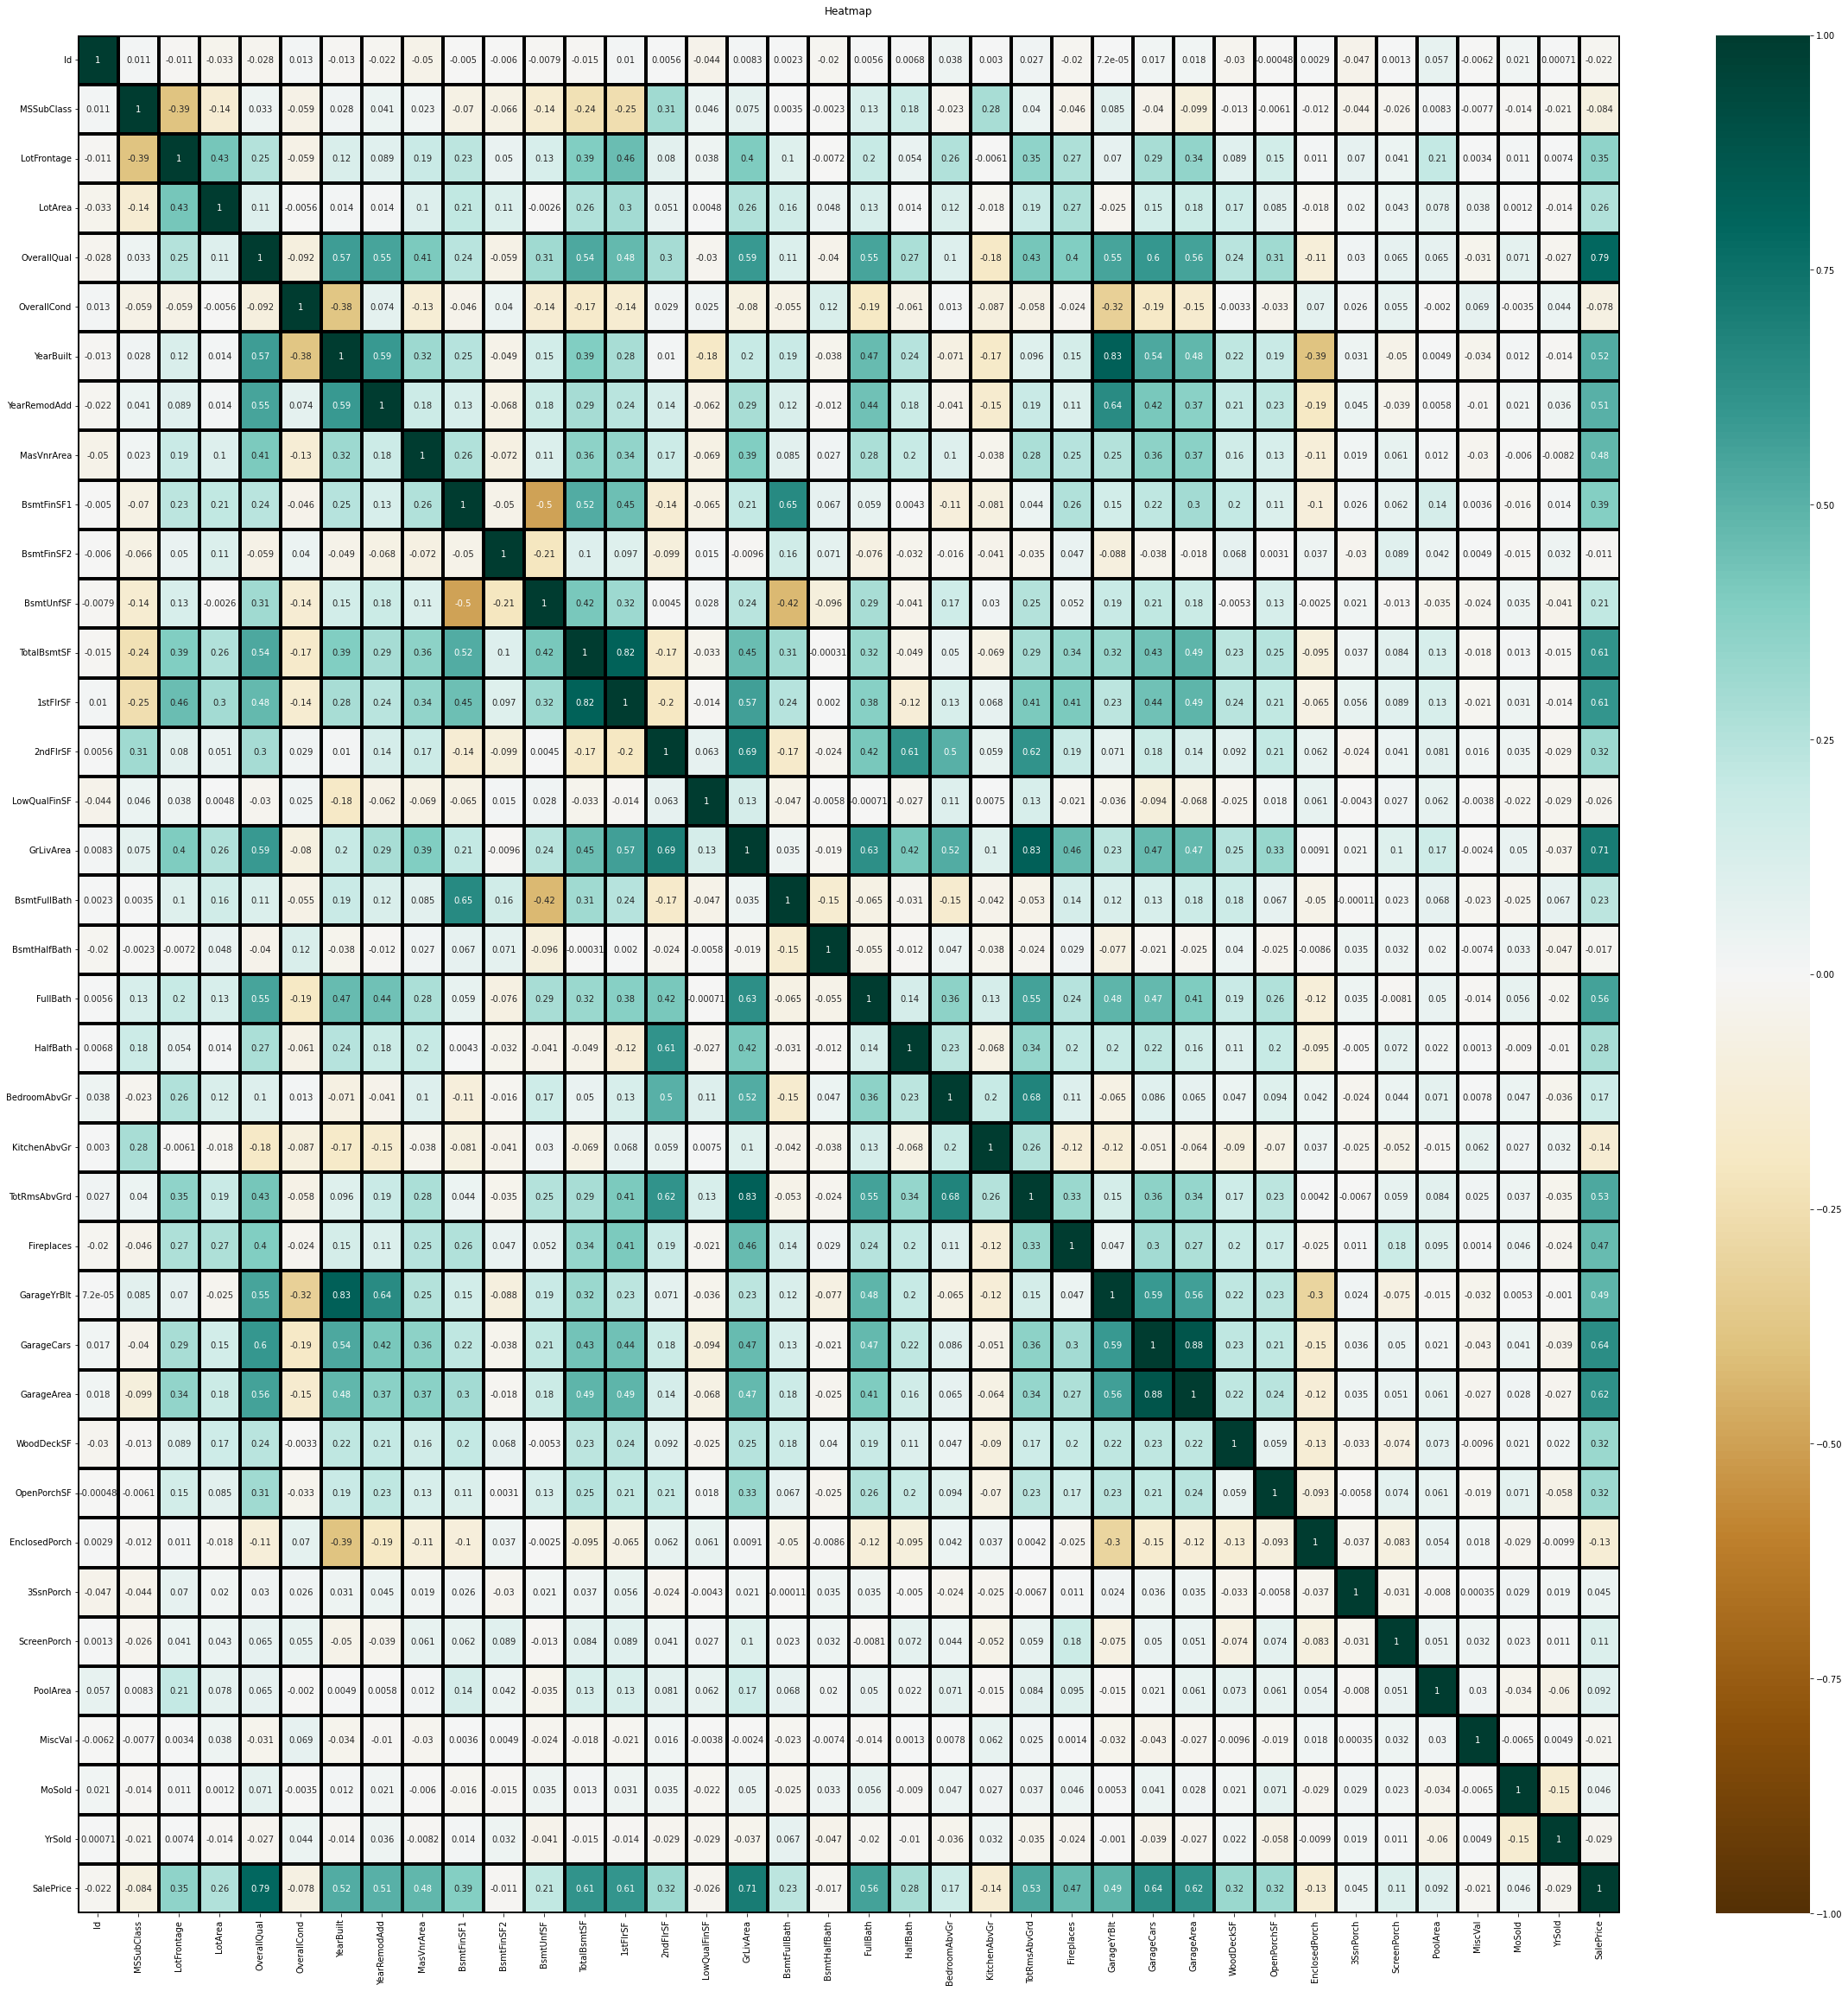

In [ ]:
plt.figure(figsize=(40, 40))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',linewidths=3, linecolor='black')
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=24);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2e21d7f40>,
      dtype=object)

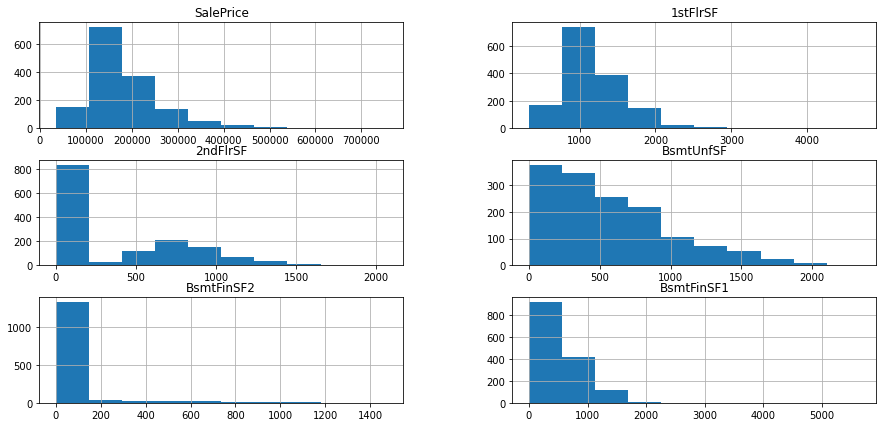

In [ ]:
features=["SalePrice","1stFlrSF","2ndFlrSF","BsmtUnfSF","BsmtFinSF2","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]
data[features].hist(figsize=(15,7))

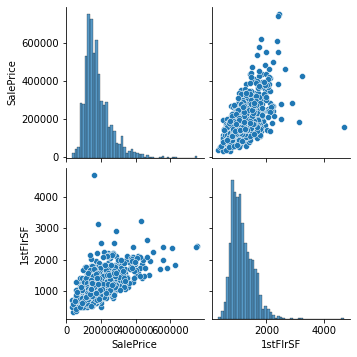

In [ ]:
sns.pairplot(data[["SalePrice","1stFlrSF"]])

In [ ]:
data.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
data.columns[data.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
nan_cols60 = [i for i in data.columns if data[i].isnull().sum() > 0.60*len(data)]
nan_cols60

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
newData=data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'] ,axis='columns')

In [ ]:
meanVal=data.mean()
print(meanVal)
print(data)

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [ ]:
#X.fillna(value=meanVal, inplace=True)
#X.head
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(newData)

newData = imputer.transform(newData)
print(newData.shape)

(1460, 77)


In [ ]:
df = pd.DataFrame(newData, columns = ['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice'])

X_train=features in X_train train dataset
y_train = label in y_train train dataset
X_test = features in X_test test dataset
y_test = هي اللي بنسوي لها بردكت اتوقع

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
  if (df[col].dtype == object):
    df[col]= encoder.fit_transform(df[col])

In [ ]:
scale_X = StandardScaler()
scale_y = StandardScaler()
nium_features = df.select_dtypes(include=np.number).columns.tolist()
num_features_x = [x for i,x in enumerate(nium_features) if(x!='SalePrice')]
num_features_y = [x for i,x in enumerate(nium_features) if(x not in num_features_x)]
df[num_features_x] = scale_X.fit_transform(df[num_features_x])
df[num_features_y] = scale_y.fit_transform(df[num_features_y])

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [80, 90, 100],
    'n_estimators':[100,150,200,250],
}
rfr = RandomForestRegressor()
rfr_grid_search = GridSearchCV(estimator=rfr, param_grid = parameters,
                          cv = 3, n_jobs = -1, verbose = 2)
rfr_grid_search.fit(X_train, y_train)
y_rfr_pred = rfr_grid_search.predict(X_test)
rfr_grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'max_depth': 80, 'n_estimators': 250}

RMSE: 0.32528350151678836
Feature: 0, Score: 0.00407
Feature: 1, Score: 0.00191
Feature: 2, Score: 0.00434
Feature: 3, Score: 0.00389
Feature: 4, Score: 0.01327
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00559
Feature: 7, Score: 0.00096
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00059
Feature: 10, Score: 0.00050
Feature: 11, Score: 0.00601
Feature: 12, Score: 0.00053
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00042
Feature: 15, Score: 0.00068
Feature: 16, Score: 0.58079
Feature: 17, Score: 0.00546
Feature: 18, Score: 0.01271
Feature: 19, Score: 0.00879
Feature: 20, Score: 0.00082
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00145
Feature: 23, Score: 0.00122
Feature: 24, Score: 0.00065
Feature: 25, Score: 0.00237
Feature: 26, Score: 0.00072
Feature: 27, Score: 0.00042
Feature: 28, Score: 0.00074
Feature: 29, Score: 0.00200
Feature: 30, Score: 0.00043
Feature: 31, Score: 0.00107
Feature: 32, Score: 0.00508
Feature: 33, Score: 0.02267
Feature: 34, Score: 0.00030
Feat

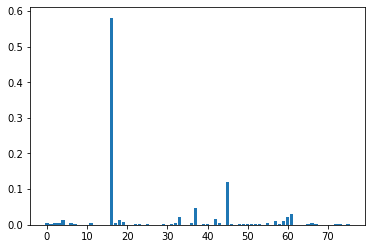

In [ ]:
from sklearn import metrics
rfr_best_grid = rfr_grid_search.best_estimator_
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rfr_pred)))
importance_rfr = rfr_grid_search.best_estimator_.feature_importances_
for i,v in enumerate(importance_rfr):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_rfr))], importance_rfr)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01,0.05,0.1,0.5,1],
              'loss': ['linear', 'square', 'exponential']}
adr = AdaBoostRegressor()
adr_grid_search = GridSearchCV(estimator=adr, param_grid = parameters,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
adr_grid_search.fit(X_train, y_train)
y_adr_pred = adr_grid_search.predict(X_test)
adr_grid_search.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


{'learning_rate': 1, 'loss': 'square', 'n_estimators': 150}

Best Score:  0.8745216622872553
Best Parameters:  {'learning_rate': 1, 'loss': 'square', 'n_estimators': 150}
RMSE: 0.37267996708531825
Feature: 0, Score: 0.00985
Feature: 1, Score: 0.00150
Feature: 2, Score: 0.00613
Feature: 3, Score: 0.00766
Feature: 4, Score: 0.04744
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00229
Feature: 7, Score: 0.00481
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00032
Feature: 10, Score: 0.00090
Feature: 11, Score: 0.02353
Feature: 12, Score: 0.00508
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00087
Feature: 16, Score: 0.20906
Feature: 17, Score: 0.02650
Feature: 18, Score: 0.01138
Feature: 19, Score: 0.02094
Feature: 20, Score: 0.00278
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00326
Feature: 23, Score: 0.00101
Feature: 24, Score: 0.00332
Feature: 25, Score: 0.00350
Feature: 26, Score: 0.03013
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00122
Feature: 29, Score: 0.02369
Feature: 30, Score: 0.00001
Featur

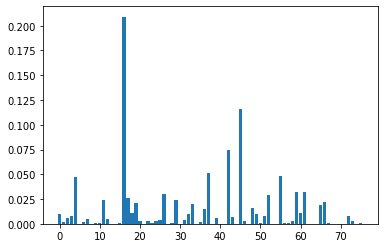

In [ ]:
adr_best_grid = adr_grid_search.best_estimator_
print('Best Score: ', adr_grid_search.best_score_)
print('Best Parameters: ', adr_grid_search.best_params_)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_adr_pred)))
importance_adr = adr_grid_search.best_estimator_.feature_importances_
for i,v in enumerate(importance_adr):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_adr))], importance_adr)
plt.show()

0.8745216622872553
{'learning_rate': 1, 'loss': 'square', 'n_estimators': 150}
0.37267996708531825
Feature: 0, Score: 0.00985
Feature: 1, Score: 0.00150
Feature: 2, Score: 0.00613
Feature: 3, Score: 0.00766
Feature: 4, Score: 0.04744
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00229
Feature: 7, Score: 0.00481
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00032
Feature: 10, Score: 0.00090
Feature: 11, Score: 0.02353
Feature: 12, Score: 0.00508
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00087
Feature: 16, Score: 0.20906
Feature: 17, Score: 0.02650
Feature: 18, Score: 0.01138
Feature: 19, Score: 0.02094
Feature: 20, Score: 0.00278
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00326
Feature: 23, Score: 0.00101
Feature: 24, Score: 0.00332
Feature: 25, Score: 0.00350
Feature: 26, Score: 0.03013
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00122
Feature: 29, Score: 0.02369
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00360
Feature: 32, Sc

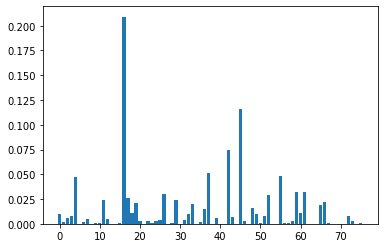

In [ ]:
adr_best_grid = adr_grid_search.best_estimator_
print(adr_grid_search.best_score_)
print(adr_grid_search.best_params_)
print(np.sqrt(metrics.mean_squared_error(y_test,y_adr_pred)))
importance_adr = adr_grid_search.best_estimator_.feature_importances_
for i,v in enumerate(importance_adr):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_adr))], importance_adr)
plt.show()

In [ ]:
parameters = {'learning_rate' : [0.02,0.03,0.04],
              'n_estimators' : [300,500,1000],
              'max_depth' : [4,6,8]
}
gbr = GradientBoostingRegressor()
gbr_grid_search = GridSearchCV(estimator=gbr, param_grid = parameters,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
gbr_grid_search.fit(X_train, y_train)
y_gbr_pred = gbr_grid_search.predict(X_test)
gbr_grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000}

0.9096950813036666
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000}
0.2894985667638898
Feature: 0, Score: 0.00209
Feature: 1, Score: 0.00088
Feature: 2, Score: 0.00661
Feature: 3, Score: 0.00170
Feature: 4, Score: 0.02057
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00584
Feature: 7, Score: 0.00135
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00006
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00485
Feature: 12, Score: 0.00098
Feature: 13, Score: 0.00040
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00031
Feature: 16, Score: 0.52379
Feature: 17, Score: 0.01059
Feature: 18, Score: 0.01733
Feature: 19, Score: 0.01498
Feature: 20, Score: 0.00042
Feature: 21, Score: 0.00004
Feature: 22, Score: 0.00131
Feature: 23, Score: 0.00021
Feature: 24, Score: 0.00012
Feature: 25, Score: 0.00110
Feature: 26, Score: 0.00265
Feature: 27, Score: 0.00027
Feature: 28, Score: 0.00017
Feature: 29, Score: 0.00206
Feature: 30, Score: 0.00030
Feature: 31, Score: 0.00058
Feature: 32, S

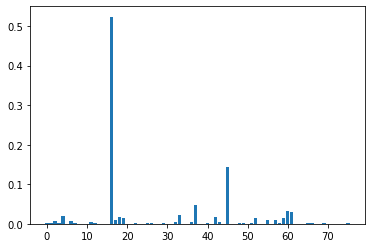

In [ ]:
gbr_best_grid = gbr_grid_search.best_estimator_
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_params_)
print(np.sqrt(metrics.mean_squared_error(y_test,y_gbr_pred)))
importance_gbr = gbr_grid_search.best_estimator_.feature_importances_
for i,v in enumerate(importance_gbr):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_gbr))], importance_gbr)
plt.show()

In [ ]:
Xx = df.iloc[:, :-1]
Yy = df.iloc[:, -1]
Xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [ ]:
Xx.head

<bound method NDFrame.head of             Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0    -1.730865    0.200350 -0.045532    -0.154161 -0.549214  0.064238   
1    -1.728492   -1.001421 -0.045532     0.633181  0.019617  0.064238   
2    -1.726120    0.200350 -0.045532     0.003308  0.698223  0.064238   
3    -1.723747    0.440704 -0.045532    -0.416608 -0.010321  0.064238   
4    -1.721374    0.200350 -0.045532     0.843139  1.440032  0.064238   
...        ...         ...       ...          ...       ...       ...   
1455  1.721374    0.200350 -0.045532    -0.311629 -0.748804  0.064238   
1456  1.723747   -1.001421 -0.045532     0.895628  1.243769  0.064238   
1457  1.726120    0.440704 -0.045532    -0.101671 -0.256482  0.064238   
1458  1.728492   -1.001421 -0.045532     0.003308  0.042903  0.064238   
1459  1.730865   -1.001421 -0.045532     0.370734  0.132718  0.064238   

      LotShape  LandContour  Utilities  LotConfig  ...  OpenPorchSF  \
0     0.750731     0.3

In [ ]:
Yy.head

<bound method NDFrame.head of 0       0.702407
1       0.272138
2       0.879230
3      -0.582507
4       1.185723
          ...   
1455    0.124785
1456    0.720089
1457    1.380229
1458   -0.553036
1459   -0.423366
Name: SalePrice, Length: 1460, dtype: float64>

In [ ]:
test=read_csv("test.csv")

In [ ]:
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'] ,axis='columns')

In [ ]:
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2 = imputer.fit(test)

newTest = imputer.transform(test)
print(newTest.shape)

(1459, 76)


In [ ]:
testDF = pd.DataFrame(newTest, columns = ['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition'])

In [ ]:
encoder = LabelEncoder()
for col in testDF.columns:
  if (testDF[col].dtype == object):
    testDF[col]= encoder.fit_transform(testDF[col])

X_test = testDF
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,2,56,777,1,3,3,0,4,...,0,0,0,18,0,0,5,4,8,4
1,1,0,3,57,964,1,0,3,0,0,...,24,0,0,0,0,24,5,4,8,4
2,2,5,3,50,947,1,0,3,0,4,...,22,0,0,0,0,0,2,4,8,4
3,3,5,3,54,587,1,0,3,0,4,...,24,0,0,0,0,0,5,4,8,4
4,4,11,3,19,118,1,0,1,0,4,...,68,0,0,27,0,0,0,4,8,4


In [ ]:
columns = df.columns
target = ['SalePrice']
features = columns[1:]

X_train = df[features]
y_train = df[target]
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.200350,-0.045532,-0.154161,-0.549214,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,-1.599111,0.138777,0.313867,0.208502,0.702407
1,-1.001421,-0.045532,0.633181,0.019617,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,-0.489110,-0.614439,0.313867,0.208502,0.272138
2,0.200350,-0.045532,0.003308,0.698223,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,0.990891,0.138777,0.313867,0.208502,0.879230
3,0.440704,-0.045532,-0.416608,-0.010321,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,4.284008,-0.114517,-0.255029,-0.062051,-0.162018,-1.599111,-1.367655,0.313867,-3.426284,-0.582507
4,0.200350,-0.045532,0.843139,1.440032,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,2.100892,0.138777,0.313867,0.208502,1.185723


In [ ]:
#target = df.loc[:,"SalePrice"]
#X_x = data_df.iloc[:, :-1]
#data = df.loc[:, :"SaleCondition"]
Yyy=np.array(Yy)

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Yyy)
#view transformed values
Yyy.shape

(1460,)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xx, y_transformed)
y_test=clf.predict(X_test)
y_test

array([586, 586, 652, ..., 586, 518, 652])

In [ ]:
y_test.shape

(1459,)

In [ ]:
id=test['Id']
results=pd.concat([id,pd.Series(y_test,name='SalePrice')], axis=1)
results.to_csv('./finalAss.csv',index=False, header=True)